In [1]:
import numpy as np

from pulse2percept import electrode2currentmap as e2cm
from pulse2percept import effectivecurrent2brightness as ec2b

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Create a retina
r_sampling = 100       # spatial sampling of retina
axon_lambda = 2        # constant that determines fall-off with axonal distance
rot = 0 * np.pi / 180  # retina rotation angle
retina = e2cm.Retina(sampling=r_sampling, axon_lambda=axon_lambda, rot=rot,
                     xlo=-3500, xhi=2500, ylo=-3000, yhi=3000)

In [3]:
# Place an Argus I array on the retina
argus = e2cm.ArgusII(x_center=-500, y_center=100, h=100, rot=45*np.pi/180)

2017-04-27 14:00:10,901 [pulse2percept.electrode2currentmap] [WARNING] Distance to fovea=3211 > 3000 um, assuming same layer thicknesses as for 1550-3000 um distance.


In [4]:
# The temporal model contains the cascade of operations that leads from pulse to percept:
tsample = 0.005 / 1000  # Sample step (s)
tm = ec2b.TemporalModel(tsample)

In [5]:
# Send a pulse train to two specific electrodes, set all others to zero
pt = e2cm.Psycho2Pulsetrain(tsample, freq=50, amp=20, dur=0.5)
stim = {'E2': pt, 'E10': pt}

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


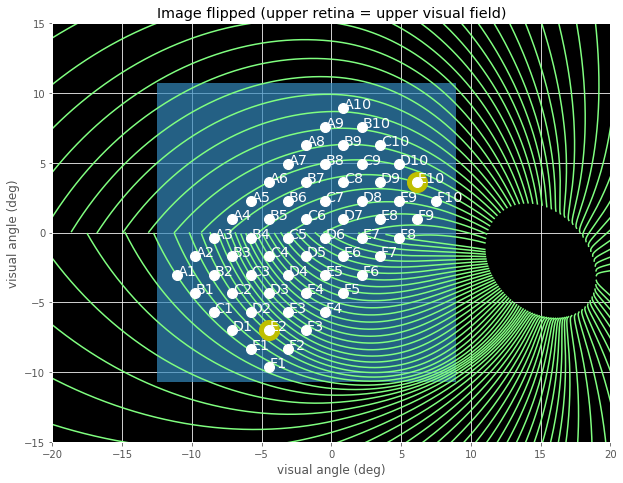

In [6]:
from matplotlib import patches

# Plot axon bundles (plot every 5th for the sake of visualization)
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.set_axis_bgcolor('black')
ax.plot(retina.jan_x[:, ::5], -retina.jan_y[:, ::5], c=(0.5, 1, 0.5))

# Draw in the the retinal patch we're simulating.
# This defines the size of our "percept" image below.
ax.add_patch(patches.Rectangle((e2cm.micron2deg(retina.gridx.min()), 
                                -e2cm.micron2deg(retina.gridy.max())),
                               e2cm.micron2deg(retina.gridx.max() - retina.gridx.min()),
                               e2cm.micron2deg(retina.gridy.max() - retina.gridy.min()),
                               alpha=0.7))

# Plot location of stimulated electrodes
for key in stim:
    ax.plot(e2cm.micron2deg(argus[key].x_center),
            -e2cm.micron2deg(argus[key].y_center), 'oy',
            markersize=np.sqrt(argus[key].radius)*2)

# Plot all electrodes and their label
for e in argus.electrodes:
    ax.text(e2cm.micron2deg(e.x_center + 10), -e2cm.micron2deg(e.y_center + 5), e.name,
            color='white', size='x-large')
    ax.plot(e2cm.micron2deg(e.x_center), -e2cm.micron2deg(e.y_center), 'ow',
            markersize=np.sqrt(e.radius))

ax.set_aspect('equal')
ax.set_xlim(-20, 20)
ax.set_xlabel('visual angle (deg)')
ax.set_ylim(-15, 15)
ax.set_ylabel('visual angle (deg)')
ax.set_title('Image flipped (upper retina = upper visual field)')
fig.savefig('jansonius_argusII.png')

In [7]:
ecs, cs = retina.electrode_ecs(argus)

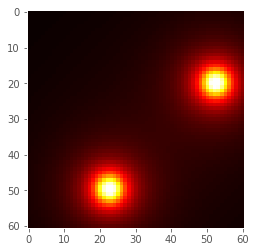

In [8]:
plt.imshow(cs[..., 1, argus.get_index('E2')] + cs[..., 1, argus.get_index('E10')], cmap='hot')
plt.grid('off')
plt.savefig('cs.png')

In [9]:
mov = ec2b.pulse2percept(stim, argus, tm, retina, n_jobs=8, dojit=True, tol=0.10)

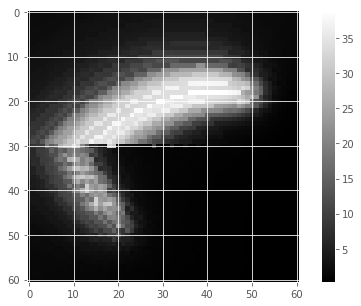

In [10]:
frame = ec2b.get_brightest_frame(mov)
plt.figure(figsize=(8, 5))
plt.imshow(frame.data, cmap='gray')
plt.colorbar()
plt.savefig('percept')

In [11]:
def dva2ret(r_deg):
    r_mm = 0.268 * r_deg + 3.427e-4 * r_deg ** 2 - 8.3309e-6 * r_deg ** 3
    return 1e3 * r_mm

In [12]:
def ret2dva(r_um):
    r_mm = 1e-3 * r_um
    return 3.556 * r_mm + 0.05993 * r_mm ** 2 - 0.007358 * r_mm ** 3 + 3.027e-4 * r_mm ** 4

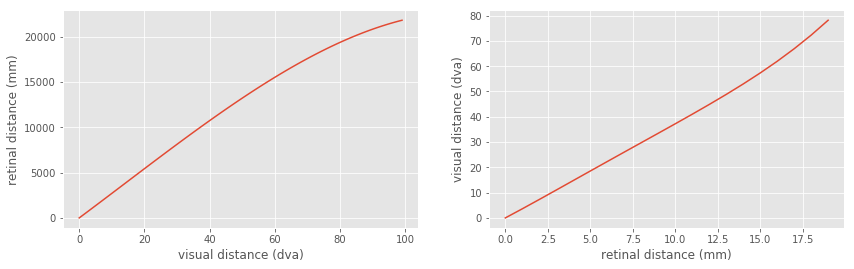

In [13]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.plot(np.arange(100), dva2ret(np.arange(100)))
plt.xlabel('visual distance (dva)')
plt.ylabel('retinal distance (mm)')

plt.subplot(122)
plt.plot(np.arange(20), ret2dva(np.arange(20) * 1000))
plt.xlabel('retinal distance (mm)')
plt.ylabel('visual distance (dva)')

In [14]:
watson_fig5 = np.array([-16.84049, 0.11570,
-16.01227, 0.13223,
-14.90798, 0.17355,
-13.77301, 0.22314,
-12.82209, 0.28099,
-11.84049, 0.34711,
-10.85890, 0.41736,
-10.09202, 0.50413,
-9.32515, 0.58678,
-8.71166, 0.67769,
-8.03681, 0.76446,
-7.54601, 0.85950,
-6.80982, 0.99587,
-6.31902, 1.08264,
-5.82822, 1.18182,
-5.33742, 1.30992,
-4.72393, 1.44628,
-4.29448, 1.56198,
-3.86503, 1.66942,
-3.43558, 1.77273,
-2.94479, 1.86777,
-2.48466, 1.94215,
-2.08589, 1.95455,
-1.71779, 1.94215,
-1.47239, 1.90909,
-1.25767, 1.85124,
-1.04294, 1.77686,
-0.92025, 1.69421,
-0.76687, 1.60331,
-0.61350, 1.48760,
-0.55215, 1.39669,
-0.42945, 1.25620,
-0.27607, 1.13223,
-0.27607, 1.04132,
-0.18405, 0.93388,
-0.18405, 0.81818,
-0.06135, 0.70248,
0.00000, 0.62810,
0.06135, 0.79339,
0.18405, 0.95868,
0.21472, 1.09504,
0.30675, 1.22314,
0.30675, 1.33884,
0.42945, 1.44628,
0.46012, 1.58678,
0.67485, 1.73554,
0.79755, 1.85950,
0.95092, 1.98347,
1.16564, 2.09917,
1.53374, 2.16942,
1.84049, 2.19835,
2.14724, 2.18595,
2.51534, 2.13636,
2.76074, 2.06612,
3.06748, 1.99174,
3.37423, 1.89256,
3.86503, 1.76860,
4.17178, 1.65289,
4.53988, 1.54545,
4.84663, 1.47521,
5.21472, 1.36364,
5.58282, 1.23967,
5.98160, 1.13223,
6.38037, 1.04959,
6.68712, 0.97521,
7.05521, 0.89256,
7.42331, 0.80992,
7.91411, 0.71901,
8.34356, 0.63636,
9.01840, 0.54959,
9.57055, 0.48347,
10.30675, 0.40496,
11.10429, 0.31405,
11.96319, 0.24793,
12.82209, 0.20248,
13.83436, 0.14876,
14.60123, 0.12397,
15.39877, 0.09917,
16.28834, 0.07438,
16.74847, 0.06612]).reshape((-1, 2))

In [15]:
from scipy import stats
def displace(r, meridian='temporal'):
    if meridian == 'temporal':
        alpha = 1.8938
        beta = 2.4598
        gamma = 0.91565
        delta = 14.904
        mu = -0.09386
        scale = 12.0
    else:
        alpha = 2.4607
        beta = 1.7463
        gamma = 0.77754
        delta = 15.111
        mu = -0.15933
        scale = 10.0
    
    rmubeta = (r - mu) / beta
    numer = delta * gamma * np.exp(-rmubeta ** gamma) * rmubeta ** (alpha * gamma - 1)
    denom = beta * stats.gamma.pdf(alpha, 5)
    

    return numer / denom / scale

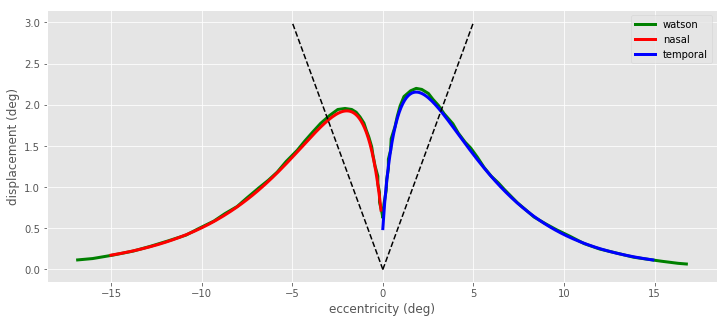

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(watson_fig5[:, 0], watson_fig5[:, 1], 'g', linewidth=3, label='watson')

x = np.arange(-15, 0, 0.1)
plt.plot(x, displace(np.abs(x), 'nasal'), 'r', linewidth=3, label='nasal')

x = np.arange(0, 15, 0.1)
plt.plot(x, displace(x, 'temporal'), 'b', linewidth=3, label='temporal')
plt.plot([0, 5], [0, 3], 'k--')
plt.plot([0, -5], [0, 3], 'k--')
plt.xlabel('eccentricity (deg)')
plt.ylabel('displacement (deg)')
plt.legend()

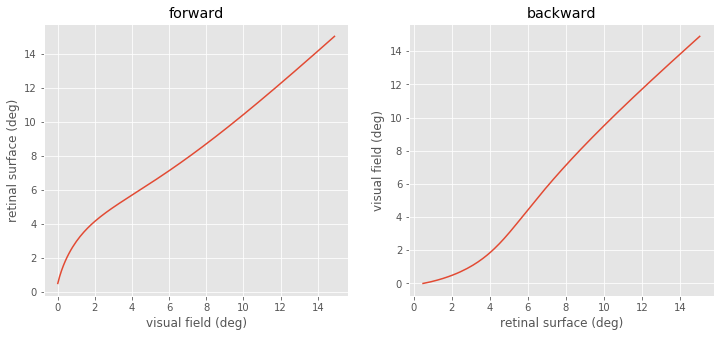

In [17]:
import scipy.interpolate as spi
vf = np.arange(0, 15, 0.1)
rs = vf + displace(vf, 'temporal')

# from visual field to retinal surface
# what the Watson displacement curve does
rs_vf = spi.interp1d(vf, rs, fill_value='extrapolate')

# from retinal surface to visual field
# inverse of Watson displacement curve
# what an implant might do
vf_rs = spi.interp1d(rs, vf, fill_value='extrapolate')

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(vf, rs)
plt.title('forward')
plt.xlabel('visual field (deg)')
plt.ylabel('retinal surface (deg)')

plt.subplot(122)
plt.plot(rs, vf)
plt.title('backward')
plt.xlabel('retinal surface (deg)')
plt.ylabel('visual field (deg)')

In [18]:
from skimage.io import imread
from skimage.transform import warp

In [19]:
def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho

In [20]:
def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

In [21]:
def warp_img(xy, xy_center, r_sampling=100.0):
    theta, rho_old = cart2pol((xy[:, 0] - xy_center[0]) * r_sampling,
                              (xy[:, 1] - xy_center[1]) * r_sampling)
    rho_old = ret2dva(rho_old)
    
    # TODO: temporal vs nasal
    rho_new = vf_rs(rho_old)
    rho_new[rho_new < 0] = np.inf
    rho_new = dva2ret(rho_new)

    # Back to Cartesian
    x_new, y_new = pol2cart(theta, rho_new)
    
    # Back to image coordinates
    x_new /= r_sampling
    y_new /= r_sampling

    return np.hstack((x_new + xy_center[0], y_new + xy_center[1]))

In [22]:
def plot_warped(img, deltax, xy_center=None):
    if not xy_center:
        xy_center = [img.shape[1] / 2.0, img.shape[0] / 2.0]
    warped = warp(img, inverse_map=warp_img, map_args={'xy_center': xy_center, 'r_sampling': deltax})
    
    plt.figure(figsize=(14, 8))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.grid('off')
    plt.subplot(122)
    plt.imshow(warped, cmap='gray')
    plt.grid('off')

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


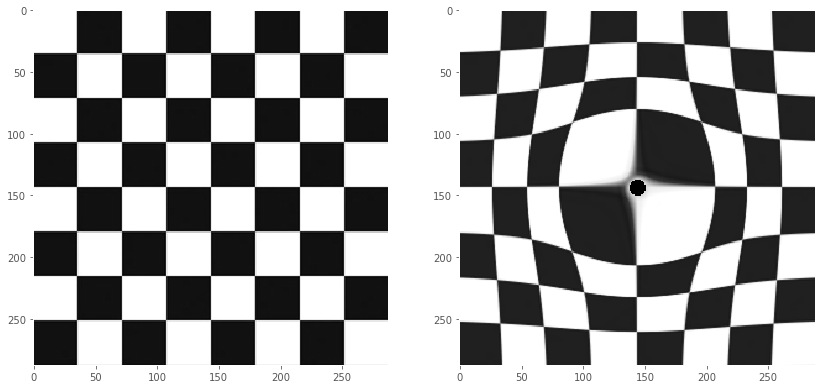

In [23]:
img = imread('checkerboard.jpg', as_grey=True)
deltax = r_sampling / img.shape[0] * frame.data.shape[0]
plot_warped(img, deltax)

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


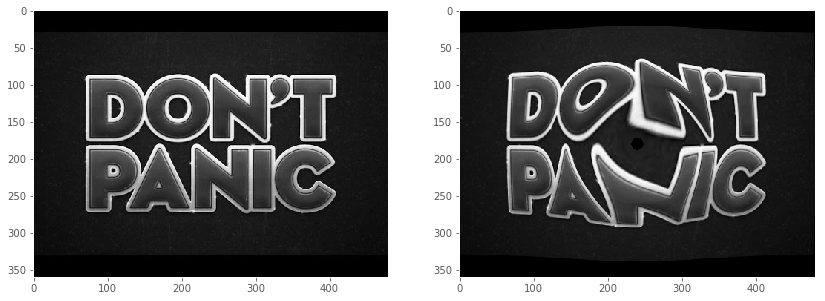

In [24]:
img = imread('hitchhiker.jpg', as_grey=True)
deltax = r_sampling / img.shape[0] * frame.data.shape[0]
plot_warped(img, deltax)

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


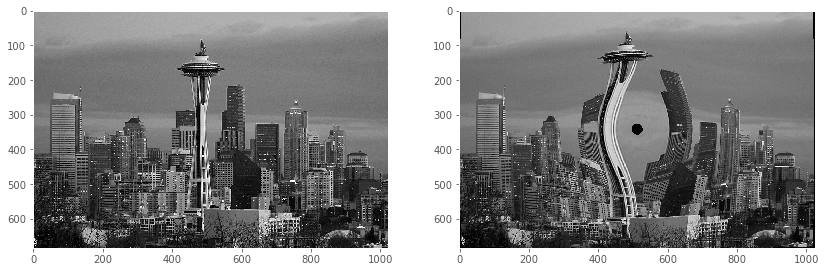

In [25]:
img = imread('seattle.jpg', as_grey=True)
deltax = r_sampling / img.shape[0] * frame.data.shape[0]
plot_warped(img, deltax)

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


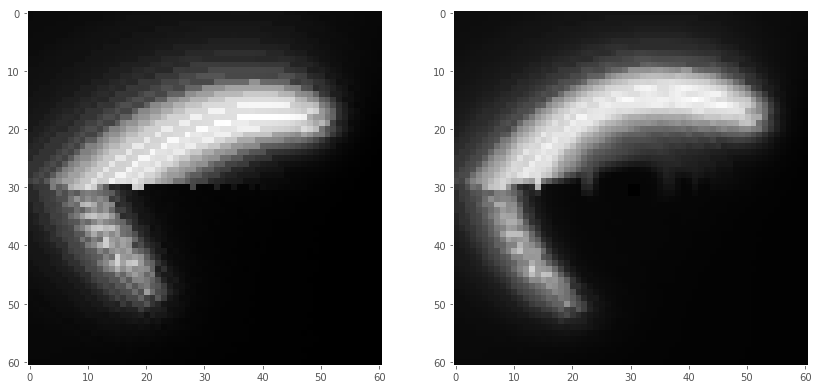

In [26]:
plot_warped(frame.data, r_sampling)